<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [2]:
# Write your code here


import requests
import csv
from bs4 import BeautifulSoup
list2=[]
list1=[item*10 for item in range(1,11)]

for item in list1:
  URL = 'https://citeseerx.ist.psu.edu/search?q=natural+language+processing&submit.x=0&submit.y=0&sort=rlv&t=doc'.format(item)
  page = requests.get(URL)
  soup = BeautifulSoup(page.content, 'html.parser')
  for item in soup.find_all("div",{"class":"snippet"}):
    list2.append(item.text)
import pandas as pd
df=pd.DataFrame({"AbstractData":list2})
df.to_csv("abstract.csv")
df


,AbstractData
0,"""... ..."""
1,"""... The concept of maximum entropy can be tra..."
2,"""... Scaling conditional random fields for nat..."
3,"""... The paper addresses the issue of cooperat..."
4,"""... In most natural language processing appli..."
...,...
95,"""... We propose a unified neural network archi..."
96,"""... Natural Language Processing The subject o..."
97,"""... Robots that interact with humans face-to-..."
98,"""... Natural languages are languages spoken by..."


In [3]:
Reviews=[]
for item in df['AbstractData']:
    Reviews.append(item)
print(len(Reviews))

100


In [4]:
!pip install tomotopy


     |████████████████████████████████| 16.3 MB 4.3 MB/s 


In [5]:
!pip install pyLDAvis==2.1.2



     |████████████████████████████████| 1.6 MB 5.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=e87eb4927b72d61ea7dd48b0f7e965375a57ce0395c1dd8e1cfec150c07291e2
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [6]:
import json
import zipfile
import glob
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
from textblob import Word
from textblob import TextBlob
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import spacy
import os
import logging
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tomotopy as tp
import numpy as np
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [8]:
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
stop_words = stopwords.words('english')

In [9]:
# Data Processing

#converting to lower case
df['AbstractData']=df['AbstractData'].map(lambda item: item.lower())
#removing punctutations
df['AbstractData']=df['AbstractData'].map(lambda item: re.sub('[?|!|\'|"|#]', '', item))
#Lemmitizing
df['AbstractData']=df['AbstractData'].apply(lambda item:" ".join(item for item in item.split() if item not in words))
df['AbstractData']=df['AbstractData'].apply(lambda item: " ".join([Word(word).lemmatize() for word in item.split()]))
df

,AbstractData
0,... ...
1,... concept maximum entropy traced back along ...
2,... scaling conditional random field natural l...
3,... paper address issue cooperation linguistic...
4,"... natural language processing applications, ..."
...,...
95,... propose unified neural network architectur...
96,... natural language processing subject natura...
97,... robot interact human face-to-face using na...
98,... natural language language spoken humans. c...


In [10]:
modelSLDA = tp.SLDAModel(k=10) 
for item in df['AbstractData']:
    modelSLDA.add_doc(item.split())
for item in range(0, 100, 10):
    modelSLDA.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(item, modelSLDA.ll_per_word))
for k in range(modelSLDA.k):
    print('Top 15 words of topic #{}'.format(k))
    print(modelSLDA.get_topic_words(k, top_n=25))

modelSLDA.summary()

Iteration: 0	Log-likelihood: -4.295377995807027
Iteration: 10	Log-likelihood: -4.014985529818232
Iteration: 20	Log-likelihood: -3.9239220969260686
Iteration: 30	Log-likelihood: -3.8570667616904726
Iteration: 40	Log-likelihood: -3.841561317538458
Iteration: 50	Log-likelihood: -3.8013736536578526
Iteration: 60	Log-likelihood: -3.7447128513502697
Iteration: 70	Log-likelihood: -3.7183128668202294
Iteration: 80	Log-likelihood: -3.6863479177157084
Iteration: 90	Log-likelihood: -3.652615113769259
Top 15 words of topic #0
[('language', 0.09948616474866867), ('natural', 0.09948616474866867), ('processing', 0.09948616474866867), ('broad', 0.06633515655994415), ('...', 0.06633515655994415), ('level', 0.03318415582180023), ('subject', 0.03318415582180023), ('considered', 0.03318415582180023), ('narrow', 0.03318415582180023), ('senses.', 0.03318415582180023), ('sense,', 0.03318415582180023), ('cover', 0.03318415582180023), ('recognition,', 0.03318415582180023), ('including', 0.03318415582180023), (

In [11]:
topic_term_dists = np.stack([modelSLDA.get_topic_word_dist(k) for k in range(modelSLDA.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in modelSLDA.docs])
doc_lengths = np.array([len(doc.words) for doc in modelSLDA.docs])
vocab = list(modelSLDA.used_vocabs)
term_frequency = modelSLDA.used_vocab_freq

prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency
)
pyLDAvis.save_html(prepared_data, 'ldavis.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


In [12]:
pyLDAvis.display(prepared_data)


In [13]:
ReviewData = [re.sub('\S*@\S*\s?', '', sent) for sent in Reviews]
ReviewData = [re.sub('\s+', ' ', sent) for sent in Reviews]
ReviewData = [re.sub("\'", "", sent) for sent in Reviews]

<input>:1: DeprecationWarning: invalid escape sequence \S
<input>:1: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:1: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \s
<ipython-input-13-4c4143fe9bc1>:1: DeprecationWarning: invalid escape sequence \S
  ReviewData = [re.sub('\S*@\S*\s?', '', sent) for sent in Reviews]
<ipython-input-13-4c4143fe9bc1>:2: DeprecationWarning: invalid escape sequence \s
  ReviewData = [re.sub('\s+', ' ', sent) for sent in Reviews]


In [14]:
def wordTokens(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

wordList = list(wordTokens(ReviewData))


In [15]:
bigramData = gensim.models.Phrases(wordList, min_count=5, threshold=50) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigramData)

In [16]:
def Stopwords(sentences):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in sentences]
def Bigrams(sentences):
    return [bigram_mod[doc] for doc in sentences]
def lemmatization(sentences, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in sentences:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
words_nostops = Stopwords(wordList) # Calling stopswords
words_bigrams = Bigrams(words_nostops) # Calling Bigrams
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
id2word = corpora.Dictionary(data_lemmatized)
sentences = data_lemmatized
corpus = [id2word.doc2bow(sentence) for sentence in sentences]

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [18]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [19]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.038*"permit" + 0.038*"thread" + 0.038*"trace" + 0.038*"entropy" + 0.038*"pattern" + 0.038*"become" + 0.038*"biblical" + 0.038*"concept" + 0.038*"powerful" + 0.038*"problem"'), (1, '0.077*"language" + 0.077*"natural" + 0.051*"processing" + 0.051*"condition" + 0.051*"term" + 0.051*"semantic" + 0.051*"description" + 0.051*"logic" + 0.026*"deposit" + 0.026*"field"'), (2, '0.009*"recognition" + 0.009*"application" + 0.009*"time" + 0.009*"widescale" + 0.009*"computer" + 0.009*"multiple" + 0.009*"recently" + 0.009*"back" + 0.009*"estimation" + 0.009*"paper"'), (3, '0.008*"task" + 0.008*"speech" + 0.008*"chunk" + 0.008*"recognition" + 0.008*"unify" + 0.008*"try" + 0.008*"eng" + 0.008*"processing" + 0.008*"neural" + 0.008*"avoid"'), (4, '0.151*"language" + 0.108*"natural" + 0.065*"understand" + 0.043*"processing" + 0.043*"computer" + 0.043*"way" + 0.022*"refer" + 0.022*"try" + 0.022*"point" + 0.022*"unprocessed"'), (5, '0.008*"application" + 0.008*"back" + 0.008*"paper" + 0.008*"recentl

In [20]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.119164 -0.179079       1        1  22.736657
4     -0.155526 -0.093660       2        1  21.303497
1     -0.127041 -0.097211       3        1  17.969836
6     -0.193525  0.093464       4        1  13.306164
8     -0.067968  0.305350       5        1  12.360795
0      0.380065 -0.022966       6        1  11.881777
7      0.059859  0.015799       7        1   0.118542
2      0.082142 -0.008625       8        1   0.113060
3      0.070277 -0.005666       9        1   0.105231
5      0.070880 -0.007406      10        1   0.104441, topic_info=           Term        Freq       Total Category  logprob  loglift
116  understand   29.000000   29.000000  Default  30.0000  30.0000
46   linguistic   29.000000   29.000000  Default  29.0000  29.0000
31     language  174.000000  174.000000  Default  28.0000  28.0000
4      computer   29.000000   29.000000  Default  27.0000  27.0000
107         way   29.000000   29.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
31     language    0.017265  174.088066  Topic10  -4.8445  -2.3543
32      natural    0.017265  145.069857  Topic10  -4.8445  -2.1720
33   processing    0.017265   96.772056  Topic10  -4.8445  -1.7671
62     semantic    0.017265   48.637218  Topic10  -4.8445  -1.0792
37         term    0.017265   19.870637  Topic10  -4.8445  -0.1840

[400 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
119       2  0.969594     ability
120       2  0.969601        able
25        3  0.974771      access
108       2  0.969580  accomplish
65        5  0.983430     achieve
...     ...       ...         ...
107       2  0.640511         way
23        6  0.985586   widescale
38        3  0.974771        work
24        6  0.985528       world
118       2  0.969578         yet

[163 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 2, 7, 9, 1, 8, 3, 4, 6])

In [21]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"permit" + 0.038*"thread" + 0.038*"trace" + 0.038*"entropy" + '
  '0.038*"pattern" + 0.038*"become" + 0.038*"biblical" + 0.038*"concept" + '
  '0.038*"powerful" + 0.038*"problem"'),
 (1,
  '0.077*"language" + 0.077*"natural" + 0.051*"processing" + 0.051*"condition" '
  '+ 0.051*"term" + 0.051*"semantic" + 0.051*"description" + 0.051*"logic" + '
  '0.026*"deposit" + 0.026*"field"'),
 (2,
  '0.009*"recognition" + 0.009*"application" + 0.009*"time" + '
  '0.009*"widescale" + 0.009*"computer" + 0.009*"multiple" + 0.009*"recently" '
  '+ 0.009*"back" + 0.009*"estimation" + 0.009*"paper"'),
 (3,
  '0.008*"task" + 0.008*"speech" + 0.008*"chunk" + 0.008*"recognition" + '
  '0.008*"unify" + 0.008*"try" + 0.008*"eng" + 0.008*"processing" + '
  '0.008*"neural" + 0.008*"avoid"'),
 (4,
  '0.151*"language" + 0.108*"natural" + 0.065*"understand" + '
  '0.043*"processing" + 0.043*"computer" + 0.043*"way" + 0.022*"refer" + '
  '0.022*"try" + 0.022*"point" + 0.022*"unprocessed"'),
 (5,
  '

In [22]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -3.6854619890025684

Coherence Score:  0.7981622247221107


In [23]:
from gensim import corpora, models
lsamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)

In [24]:
pprint(lsamodel.print_topics(num_topics = 10))


[(0,
  '-0.624*"language" + -0.511*"natural" + -0.327*"processing" + '
  '-0.160*"semantic" + -0.118*"human" + -0.108*"understand" + -0.105*"use" + '
  '-0.103*"way" + -0.091*"broad" + -0.091*"sense"'),
 (1,
  '0.255*"linguistic" + -0.244*"human" + 0.232*"processing" + -0.216*"use" + '
  '-0.206*"robot" + -0.206*"face" + 0.196*"recognition" + 0.170*"cooperation" '
  '+ 0.168*"issue" + 0.165*"sense"'),
 (2,
  '-0.401*"linguistic" + -0.267*"cooperation" + -0.198*"paper" + '
  '-0.193*"application" + 0.185*"task" + -0.167*"nlp" + 0.157*"speech" + '
  '0.157*"include" + 0.153*"semantic" + -0.134*"direction"'),
 (3,
  '0.284*"semantic" + 0.236*"use" + 0.215*"recently" + 0.201*"description" + '
  '0.201*"logic" + 0.196*"application" + -0.194*"understand" + 0.168*"need" + '
  '0.168*"interpretation" + 0.135*"robot"'),
 (4,
  '0.272*"computer" + -0.269*"linguistic" + 0.207*"understand" + '
  '-0.179*"cooperation" + -0.169*"semantic" + -0.160*"use" + '
  '0.135*"estimation" + 0.135*"back" + 0.1

In [25]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 10, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = df['AbstractData'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:189: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs


In [26]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.038*"permit" + 0.038*"thread" + 0.038*"trace" + 0.038*"entropy" + 0.038*"pattern" + 0.038*"become" + 0.038*"biblical" + 0.038*"concept" + 0.038*"powerful" + 0.038*"problem"'), (1, '0.077*"language" + 0.077*"natural" + 0.051*"processing" + 0.051*"condition" + 0.051*"term" + 0.051*"semantic" + 0.051*"description" + 0.051*"logic" + 0.026*"deposit" + 0.026*"field"'), (2, '0.009*"recognition" + 0.009*"application" + 0.009*"time" + 0.009*"widescale" + 0.009*"computer" + 0.009*"multiple" + 0.009*"recently" + 0.009*"back" + 0.009*"estimation" + 0.009*"paper"'), (3, '0.008*"task" + 0.008*"speech" + 0.008*"chunk" + 0.008*"recognition" + 0.008*"unify" + 0.008*"try" + 0.008*"eng" + 0.008*"processing" + 0.008*"neural" + 0.008*"avoid"'), (4, '0.151*"language" + 0.108*"natural" + 0.065*"understand" + 0.043*"processing" + 0.043*"computer" + 0.043*"way" + 0.022*"refer" + 0.022*"try" + 0.022*"point" + 0.022*"unprocessed"'), (5, '0.008*"application" + 0.008*"back" + 0.008*"paper" + 0.008*"recentl

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [27]:
# Write your code here


import json
import zipfile
import glob
import pandas as pd


from textblob import TextBlob
import sklearn

import json
import zipfile
import glob
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
df_rating = pd.read_csv("https://raw.githubusercontent.com/joshivaibhav/AmazonCustomerReview/master/amazondata.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [87]:
df_rating

,Helpful Votes (bin),Number of Records,Star Rating (bin),Customer Id,Helpful Votes,Overall Votes,Product Id,Review Body,Review Year,Review Headline,Star Rating
0,0,1,0.0,NaN,4.0,14.0,26009102,You will love this book. It is a hard long re...,03/17/2005 0:00,Best Book Ever,5.0
1,NaN,1,NaN,NaN,NaN,NaN,7491727,This is the UK edition of Dr. Omit's book. Dr....,NaN,researchers from John Hopkins School of Medici...,NaN
2,0,1,0.0,NaN,2.0,2.0,002782683X,This is a fun and entertaining book about lear...,06/25/2012 0:00,Michelle,5.0
3,0,1,0.0,NaN,0.0,0.0,60187271,"Started a big slow, but once into it the autho...",06/09/2013 0:00,Loved the book,5.0
4,0,1,0.0,NaN,14.0,20.0,60392452,Received this book as a Christmas present. I h...,08/05/2003 0:00,Challenges your assumptions,4.0
...,...,...,...,...,...,...,...,...,...,...,...
128840,0,1,0,NaN,4.0,6.0,60529148,John Stossel explains within these pages how h...,05/19/2004 0:00,Heroic,4.0
128841,NaN,1,NaN,NaN,NaN,NaN,60579412,When Bill Clinton said that we were all cold w...,NaN,the record needed to be set straight. Mona Ch...,NaN
128842,NaN,1,NaN,NaN,NaN,NaN,60184973,"During her reign, Queen Mary foiled several pl...",NaN,Queen of Scots -- but then,NaN
128843,0,1,0,NaN,1.0,1.0,7444117,I just don't understand how this was supposed ...,03/26/2014 0:00,So upsetting,2.0


In [88]:
df_rating = df_rating.dropna()


In [89]:
df_rating

,Helpful Votes (bin),Number of Records,Star Rating (bin),Customer Id,Helpful Votes,Overall Votes,Product Id,Review Body,Review Year,Review Headline,Star Rating
76,0,1,0.0,10001274.0,0.0,0.0,142402516,John Green wrote an amazing book. Worth the mo...,08/31/2015 0:00,Amazing.,5.0
77,0,1,0.0,10001635.0,0.0,1.0,945367163,Classic. Awesome. American traditional tattoo.,08/29/2015 0:00,Awesome. American traditional tattoo,5.0
78,0,1,0.0,10002164.0,0.0,0.0,1512081140,Great book,08/28/2015 0:00,Five Stars,5.0
79,0,1,0.0,10002164.0,0.0,0.0,B005DI89EI,Little helpful,08/28/2015 0:00,One Star,1.0
80,0,1,0.0,10002870.0,0.0,0.0,764152319,Got this for grand baby and she is not potty t...,08/28/2015 0:00,Very good book.,5.0
...,...,...,...,...,...,...,...,...,...,...,...
126836,0,1,0,22422243.0,0.0,0.0,037586797X,A good story for students who like history and...,08/26/2015 0:00,Five Stars,5.0
126837,0,1,0,22422243.0,0.0,0.0,385389574,great books for students who like a bit of his...,08/26/2015 0:00,Five Stars,5.0
126838,0,1,0,22422766.0,0.0,0.0,1885540043,great book,08/28/2015 0:00,Five Stars,5.0
126839,0,1,0,22422766.0,0.0,0.0,1935023470,good book,08/28/2015 0:00,Five Stars,5.0


In [90]:
df_rating = df_rating.head(200)

In [91]:
df_rating

,Helpful Votes (bin),Number of Records,Star Rating (bin),Customer Id,Helpful Votes,Overall Votes,Product Id,Review Body,Review Year,Review Headline,Star Rating
76,0,1,0.0,10001274.0,0.0,0.0,142402516,John Green wrote an amazing book. Worth the mo...,08/31/2015 0:00,Amazing.,5.0
77,0,1,0.0,10001635.0,0.0,1.0,945367163,Classic. Awesome. American traditional tattoo.,08/29/2015 0:00,Awesome. American traditional tattoo,5.0
78,0,1,0.0,10002164.0,0.0,0.0,1512081140,Great book,08/28/2015 0:00,Five Stars,5.0
79,0,1,0.0,10002164.0,0.0,0.0,B005DI89EI,Little helpful,08/28/2015 0:00,One Star,1.0
80,0,1,0.0,10002870.0,0.0,0.0,764152319,Got this for grand baby and she is not potty t...,08/28/2015 0:00,Very good book.,5.0
...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,0.0,22444064.0,0.0,0.0,1929173067,This is a very well written sequence of storie...,08/29/2015 0:00,it is fun just to read about the trails and th...,5.0
307,0,1,0.0,22444330.0,0.0,0.0,B00CMWE7GC,All tractor parts fit as was stated.,08/31/2015 0:00,Five Stars,5.0
308,0,1,0.0,22445527.0,0.0,0.0,1305075447,practically new and delivered on time,08/31/2015 0:00,Five Stars,5.0
309,0,1,0.0,22447687.0,0.0,0.0,1500398942,I love science fiction and this book didn't di...,08/30/2015 0:00,Very enjoyable. Easy read.,4.0


In [93]:
df_rating.columns

Index(['Helpful Votes (bin)', 'Number of Records', 'Star Rating (bin)',
       'Customer Id', 'Helpful Votes', 'Overall Votes', 'Product Id',
       'Review Body', 'Review Year', 'Review Headline', 'Star Rating'],
      dtype='object')

In [95]:
df_rating = df_rating.loc[:,["Review Body","Star Rating"]]

In [97]:
df['Reviews']=df_rating['Review Body']
df['Ratings']=df_rating['Star Rating']

In [98]:
df.head()

,Reviews,Ratings
76,John Green wrote an amazing book. Worth the mo...,5.0
77,Classic. Awesome. American traditional tattoo.,5.0
78,Great book,5.0
79,Little helpful,1.0
80,Got this for grand baby and she is not potty t...,5.0


In [99]:
# Data Cleaning and processing
df['processedData'] = df['Reviews'].apply(lambda item: " ".join(item.lower() for item in item.split()))
df['processedData'] = df['processedData'].str.replace('[^\w\s]','')
df['cprocessedData'] = df['processedData'].apply(lambda item: " ".join(item for x in item.split() if item not in stop))
high_freq = pd.Series(' '.join(df['processedData']).split()).value_counts()[:10]
high_freq = list(high_freq.index)
df['processedData'] = df['processedData'].apply(lambda item: " ".join(item for item in item.split() if item not in high_freq))
low_freq = pd.Series(' '.join(df['processedData']).split()).value_counts()[-10:]
low_freq = list(low_freq.index)
df['processedData'] = df['processedData'].apply(lambda item: " ".join(item for item in item.split() if item not in low_freq))

df['processedData'] = df['Reviews'].str.replace('[^\w\s]','')
df['processedData'] = df['processedData'].apply(lambda item: " ".join(item.lower() for item in item.split()))
df['processedData'] = df['processedData'].apply(lambda item: " ".join(item for item in item.split() if item not in stop))

<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<ipython-input-99-05ad41277e3e>:3: DeprecationWarning: invalid escape sequence \w
  df['processedData'] = df['processedData'].s

In [100]:
def sentimentValues(x):
    if x == 5:
        return 'Very positive'
    if x == 4:
        return 'Positive'
    if x == 3:
        return 'Neutral'
    if x == 2:
        return 'Negative'
    if x == 1:
        return 'Very negative'
    
df['sentimentValues'] = df['Ratings'].apply(lambda item: sentimentValues(item))
train, test = sklearn.model_selection.train_test_split(df, train_size=0.8, test_size=0.2)

In [101]:
svc_pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])
svc = svc_pipeline.fit(train['processedData'], train['sentimentValues'])
test['sentimentPred'] = svc.predict(test['processedData'])

In [102]:
print('Displaying below are TFIDF-BASED LINEARSVC SENTIMENT ANALYSIS Data:', '\n')
print(test[['Reviews', 'sentimentValues', 'sentimentPred']])
recall_val = recall_score(test['sentimentValues'], test['sentimentPred'], average='macro')
precision_val = precision_score(test['sentimentValues'], test['sentimentPred'], average='macro')
accuracy_val = accuracy_score(test['sentimentValues'], test['sentimentPred'])*100
f1_val = f1_score(test['sentimentValues'], test['sentimentPred'], average='macro')

print('f1-score of LinearSVC :', f1_val)
print('Accuracy of LinearSVC :', accuracy_val)
print('Recall score of LinearSVC :', recall_val)
print('Precision score of LinearSVC :', precision_val)

Displaying below are TFIDF-BASED LINEARSVC SENTIMENT ANALYSIS Data: 

                                               Reviews sentimentValues  \
220                                Steves is the best.   Very positive   
226  Excellent! Finally a pregnacyt book for men fr...   Very positive   
155                             Can we call it a book!   Very negative   
242                                I love his writing!   Very positive   
248                                            Superb!   Very positive   
291  The Genius of Opposites  book nails it. As an ...   Very positive   
224                                         Great read   Very positive   
213  Great series! Read all these books in three da...   Very positive   
134                                         Excellent.   Very positive   
110                                           Loved it   Very positive   
114  “The Overlooked Letters” by Richard Cross<br /...   Very positive   
259  This is an amazing book that tells yo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
nb_pipeline = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultinomialNB())])
nb = nb_pipeline.fit(train['processedData'], train['sentimentValues'])
test['sentimentPredicted'] = nb.predict(test['processedData'])

In [104]:
print('\n', 'Display of MultinomialNB SENTIMENT ANALYSIS:', '\n', test[['Reviews', 'sentimentValues', 'sentimentPredicted']].head(10))
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
recallNB = recall_score(test['sentimentValues'], test['sentimentPredicted'], average='macro')
precisionNB = precision_score(test['sentimentValues'], test['sentimentPredicted'], average='macro')
accuracyNB = accuracy_score(test['sentimentValues'], test['sentimentPredicted'])*100
f1NB = f1_score(test['sentimentValues'], test['sentimentPredicted'], average='macro')
print('Recall score of  MultinomialNB:', recallNB)
print('Accuracy of MultinomialNB:', accuracyNB)
print('f1-score of MultinomialNB:', f1NB)
print('Precision score of MultinomialNB:', precisionNB)


 Display of MultinomialNB SENTIMENT ANALYSIS: 
                                                Reviews sentimentValues  \
220                                Steves is the best.   Very positive   
226  Excellent! Finally a pregnacyt book for men fr...   Very positive   
155                             Can we call it a book!   Very negative   
242                                I love his writing!   Very positive   
248                                            Superb!   Very positive   
291  The Genius of Opposites  book nails it. As an ...   Very positive   
224                                         Great read   Very positive   
213  Great series! Read all these books in three da...   Very positive   
134                                         Excellent.   Very positive   
110                                           Loved it   Very positive   

    sentimentPredicted  
220      Very positive  
226      Very positive  
155      Very positive  
242      Very positive  
248      Ve

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbAnalysis = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=15,verbose=2))])
analysis = gbAnalysis.fit(train['processedData'], train['sentimentValues'])
test['GBsentimentPredicted'] = analysis.predict(test['processedData'])

      Iter       Train Loss   Remaining Time 
         1           0.7647            0.24s
         2           0.6858            0.22s
         3           0.6298            0.21s
         4           0.5685            0.19s
         5           0.5353            0.18s
         6           0.5074            0.16s
         7           0.4790            0.14s
         8           0.4521            0.13s
         9           0.4288            0.11s
        10           0.4080            0.09s
        11           0.3888            0.08s
        12           0.3713            0.06s
        13           0.3570            0.04s
        14           0.3411            0.02s
        15           0.3286            0.00s


In [106]:
print('GRADIENTBOOSTING SENTIMENT ANALYSIS:', '\n')
print(test[['Reviews', 'sentimentValues', 'GBsentimentPredicted']].head(10))

recallGB = recall_score(test['sentimentValues'], test['GBsentimentPredicted'], average='macro')
precisionGB = precision_score(test['sentimentValues'], test['GBsentimentPredicted'], average='macro')
accuracyGB = accuracy_score(test['sentimentValues'], test['GBsentimentPredicted'])*100
f1GB = f1_score(test['sentimentValues'], test['GBsentimentPredicted'], average='macro')
print('Recall  of GradientBoosting:', recallGB)
print('Accuracy of GradientBoosting:', accuracyGB)
print('f1-score of GradientBoosting:', f1GB)
print('Precision  of GradientBoosting:', precisionGB)

GRADIENTBOOSTING SENTIMENT ANALYSIS: 

                                               Reviews sentimentValues  \
220                                Steves is the best.   Very positive   
226  Excellent! Finally a pregnacyt book for men fr...   Very positive   
155                             Can we call it a book!   Very negative   
242                                I love his writing!   Very positive   
248                                            Superb!   Very positive   
291  The Genius of Opposites  book nails it. As an ...   Very positive   
224                                         Great read   Very positive   
213  Great series! Read all these books in three da...   Very positive   
134                                         Excellent.   Very positive   
110                                           Loved it   Very positive   

    GBsentimentPredicted  
220        Very positive  
226        Very positive  
155        Very positive  
242        Very positive  
248        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [52]:
# Write your code here

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")



In [53]:
train_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [54]:
train_data.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [55]:
test_data.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

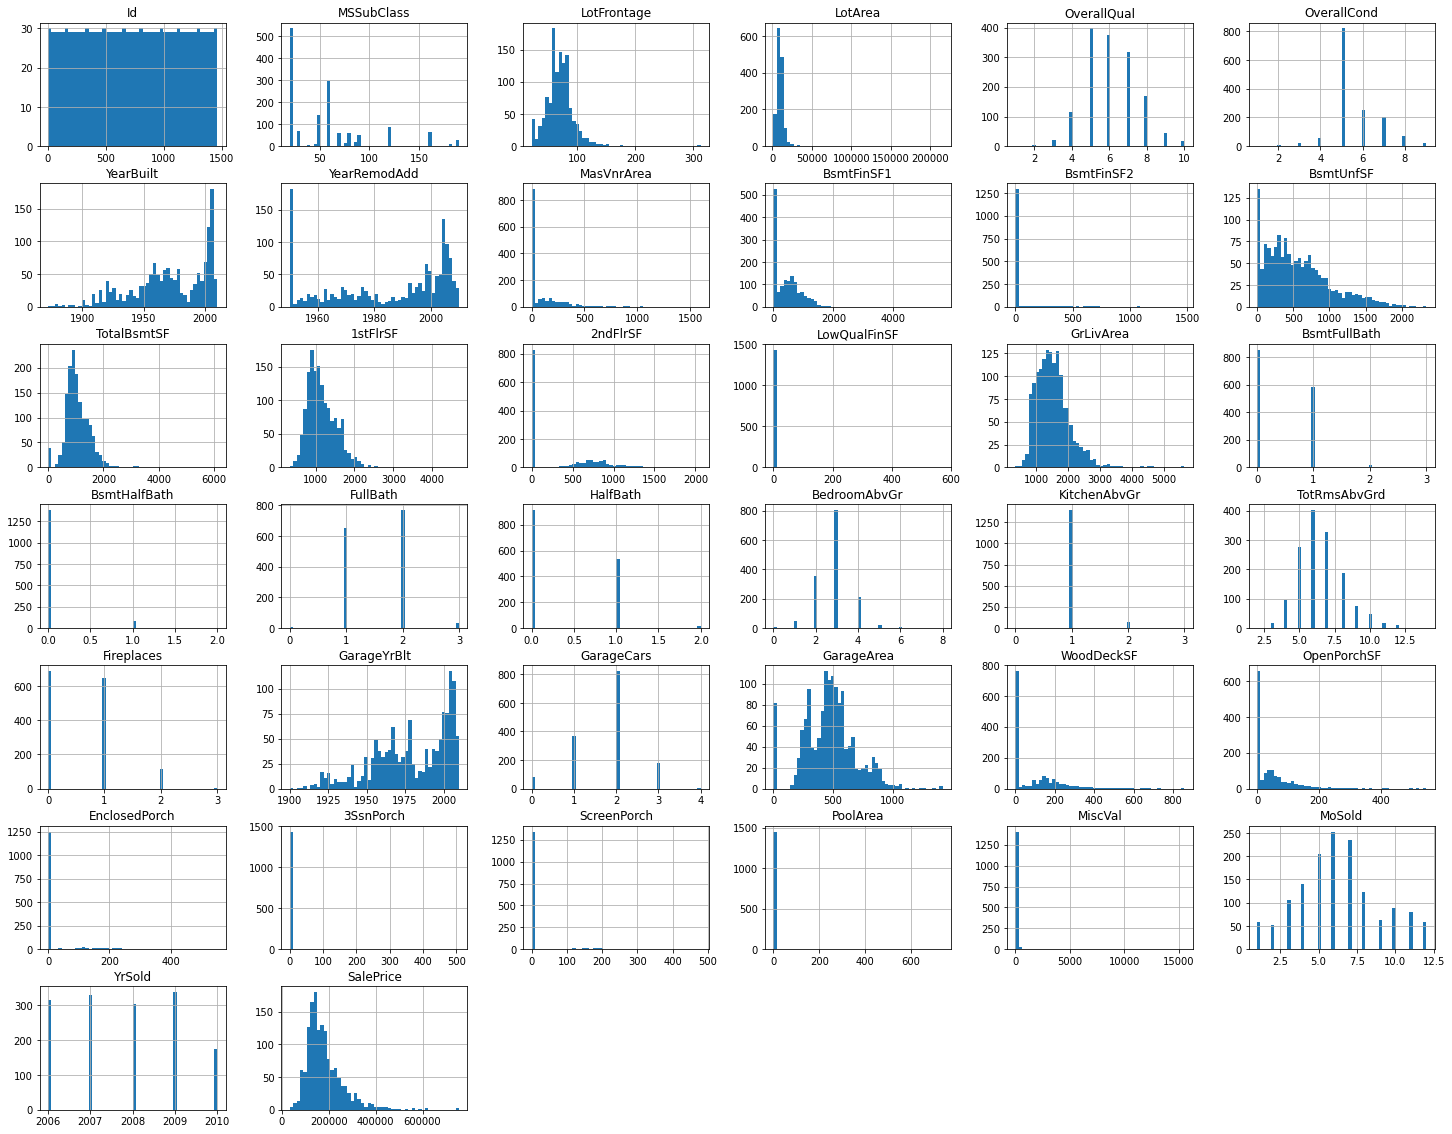

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(25,20))
plt.savefig("attribute_histogram_plots")
plt.show()

In [57]:
cormatrix = train_data.corr()
cormatrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

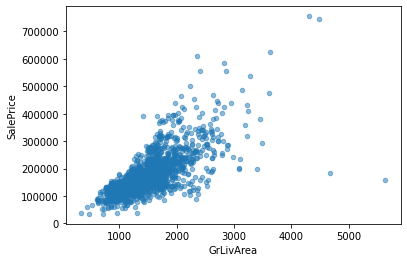

In [58]:
train_data.plot(kind="scatter",  y="SalePrice", x="GrLivArea", alpha=0.5)


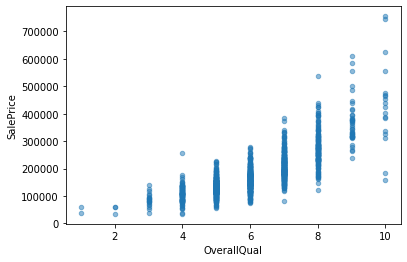

In [59]:
train_data.plot(kind="scatter", y="SalePrice", x="OverallQual", alpha=0.5)


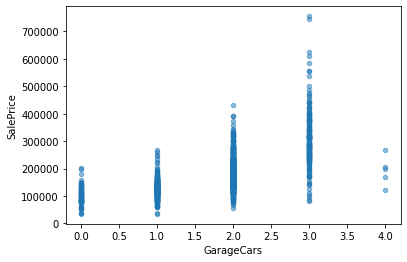

In [60]:
train_data.plot(kind="scatter", y="SalePrice",  x="GarageCars",alpha=0.5)


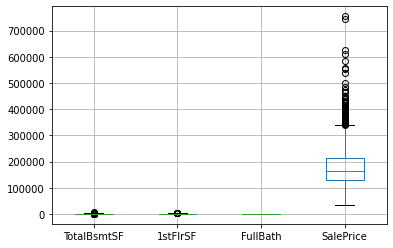

In [61]:
train_data.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])


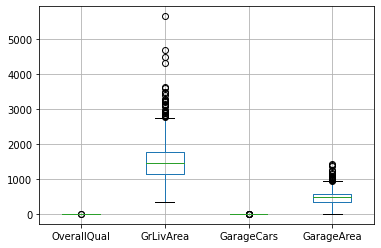

In [62]:
train_data.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])


In [63]:

train_data.fillna(train_data.mean(), inplace = True)
test_data.fillna(test_data.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
train_data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [65]:
test_data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [66]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_data[column].values))
    train_data[column] = encoder.transform(list(train_data[column].values))

In [67]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_data[column].values))
    test_data[column] = encoder_test.transform(list(test_data[column].values))

In [68]:
x_values = train_data[train_data.columns[:80]]
x_test_values = test_data[test_data.columns[:80]]
y_values = train_data['SalePrice']


In [69]:
# Training regression model

from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)


0.8548395143943592

In [70]:
predicted = reg_model.predict(x_test_values)


In [71]:
pd.DataFrame({'Predicted House Price Values': predicted})


,Predicted House Price Values
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
